<h1><center>US Presidential Election Results: A Topological Perspective</center></h1>

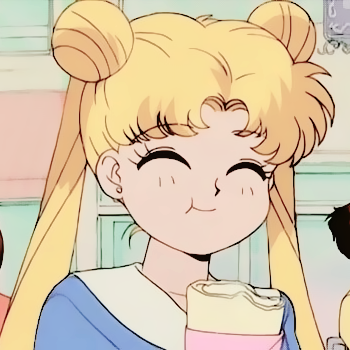

<p style="text-align: center;">Image from: https://www.wattpad.com/721277709-the-magical-girl-book-sailor-moon-pfp-icons%F0%9F%92%AB%E2%98%81%EF%B8%8F</p>

Discuss purpose of notebook

### Data Preparation  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing

from ripser import ripser
from ripser import Rips
from persim import plot_diagrams

%matplotlib inline


In [2]:
# import dataframe
df = pd.read_csv('~/Desktop/topological_machine_learning/Data/election_data.csv')

# print first 10 rows
df.head(10)

county_state  year  vote_dem  vote_rep        lat        lng
0  Abbeville,SC  2004      4389      5436  34.249604 -82.483646
1  Abbeville,SC  2008      4593      6264  34.249604 -82.483646
2  Abbeville,SC  2012      4543      5981  34.249604 -82.483646
3  Abbeville,SC  2016      3712      6742  34.249604 -82.483646
4     Acadia,LA  2004      8937     16083  30.259017 -92.422835
5     Acadia,LA  2008      7028     19229  30.259017 -92.422835
6     Acadia,LA  2012      6560     19931  30.259017 -92.422835
7     Acadia,LA  2016      5638     21159  30.259017 -92.422835
8   Accomack,VA  2004      5518      7726  37.767140 -75.666820
9   Accomack,VA  2008      7607      7833  37.767140 -75.666820

In [3]:
# normalize data
scaler = preprocessing.StandardScaler()

df[['lat','lng']] = scaler.fit_transform(df[['lat','lng']])

# print first ten rows
df.head(10)

county_state  year  vote_dem  vote_rep       lat       lng
0  Abbeville,SC  2004      4389      5436 -0.821996  0.790159
1  Abbeville,SC  2008      4593      6264 -0.821996  0.790159
2  Abbeville,SC  2012      4543      5981 -0.821996  0.790159
3  Abbeville,SC  2016      3712      6742 -0.821996  0.790159
4     Acadia,LA  2004      8937     16083 -1.641374 -0.057700
5     Acadia,LA  2008      7028     19229 -1.641374 -0.057700
6     Acadia,LA  2012      6560     19931 -1.641374 -0.057700
7     Acadia,LA  2016      5638     21159 -1.641374 -0.057700
8   Accomack,VA  2004      5518      7726 -0.099749  1.371666
9   Accomack,VA  2008      7607      7833 -0.099749  1.371666

In [26]:
# create new vote_dem:vote_rep ratio column
df['dem_rep'] = df.apply(lambda row: row.vote_dem / (row.vote_rep + row.vote_dem), axis = 1) 

# print first 10 rows
df.head(10)

county_state  year  vote_dem  vote_rep       lat       lng   dem_rep
0  Abbeville,SC  2004      4389      5436 -0.821996  0.790159  0.446718
1  Abbeville,SC  2008      4593      6264 -0.821996  0.790159  0.423045
2  Abbeville,SC  2012      4543      5981 -0.821996  0.790159  0.431680
3  Abbeville,SC  2016      3712      6742 -0.821996  0.790159  0.355079
4     Acadia,LA  2004      8937     16083 -1.641374 -0.057700  0.357194
5     Acadia,LA  2008      7028     19229 -1.641374 -0.057700  0.267662
6     Acadia,LA  2012      6560     19931 -1.641374 -0.057700  0.247631
7     Acadia,LA  2016      5638     21159 -1.641374 -0.057700  0.210397
8   Accomack,VA  2004      5518      7726 -0.099749  1.371666  0.416641
9   Accomack,VA  2008      7607      7833 -0.099749  1.371666  0.492681

In [27]:
# subset data based on year
df04 = df[df.year == 2004]

df08 = df[df.year == 2008]

df12 = df[df.year == 2012]

df16 = df[df.year == 2016]

print('df04 shape:', df04.shape)
print('df08 shape:', df08.shape)
print('df12 shape:', df12.shape)
print('df16 shape:', df16.shape)

df04 shape: (3112, 7)
df08 shape: (3112, 7)
df12 shape: (3112, 7)
df16 shape: (3112, 7)


In [28]:
print(df04.loc[df04['dem_rep'] == df04['dem_rep'].min(), 'dem_rep'].iloc[0])
print(df04.loc[df04['dem_rep'] == df04['dem_rep'].max(), 'dem_rep'].iloc[0])

0.07170761350811702
0.9052027864743607


### 2004 Presidential Election

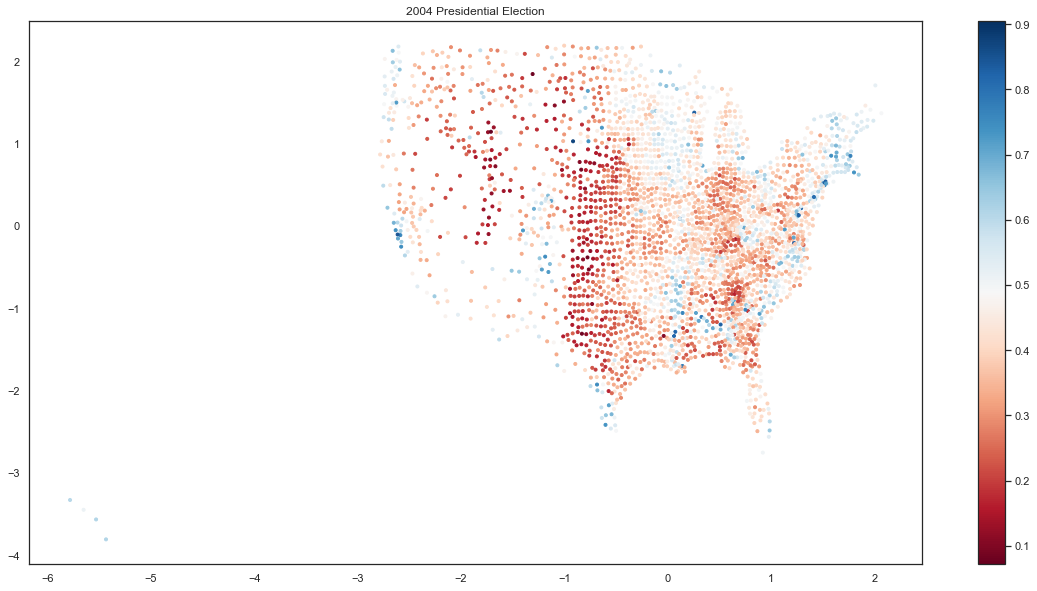

In [29]:
import seaborn as sns; sns.set()
sns.set_style("white")

plt.figure(figsize=(20,10))

plt.scatter(df04['lng'],df04['lat'] , marker = '.', c = df04['dem_rep'], cmap = 'RdBu')
plt.title('2004 Presidential Election')
plt.colorbar()

plt.show()

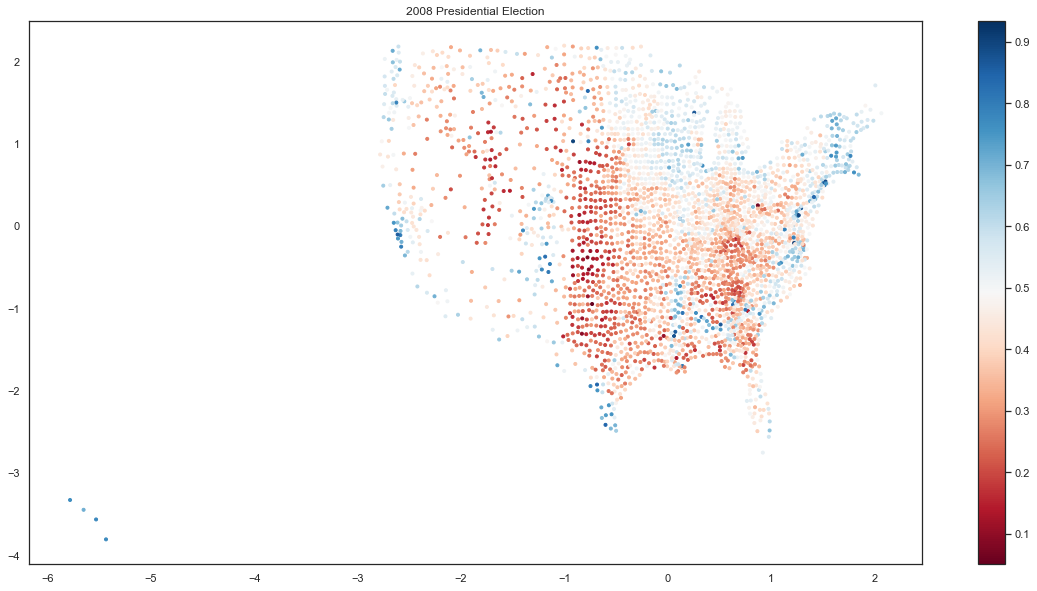

In [30]:
plt.figure(figsize=(20,10))

plt.scatter(df08['lng'],df08['lat'] , marker = '.', c = df08['dem_rep'], cmap = 'RdBu')
plt.title('2008 Presidential Election')
plt.colorbar()

plt.show()

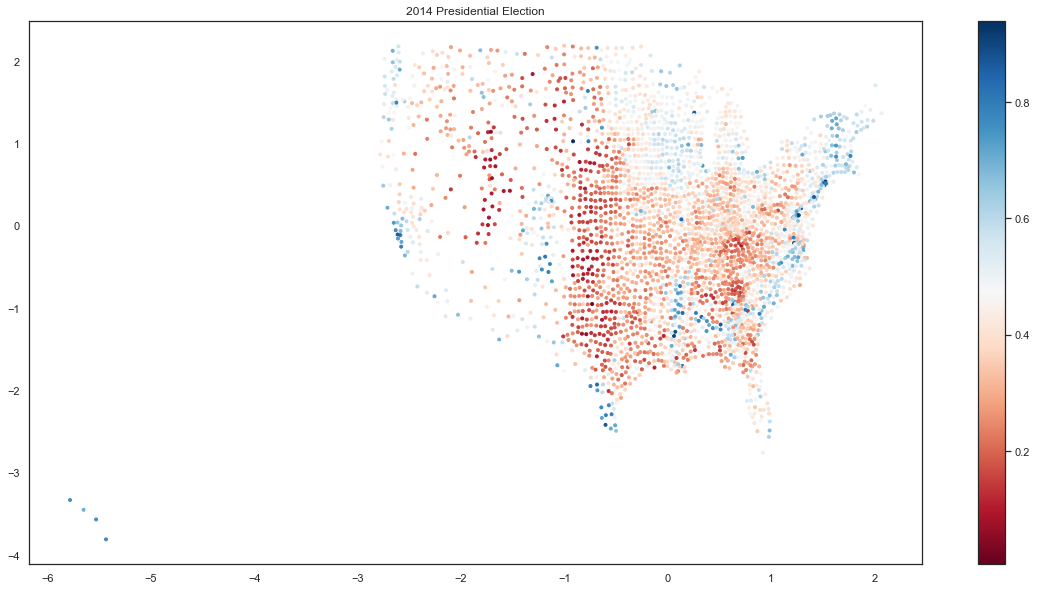

In [31]:
plt.figure(figsize=(20,10))

plt.scatter(df12['lng'],df12['lat'] , marker = '.', c = df12['dem_rep'], cmap = 'RdBu')
plt.title('2014 Presidential Election')
plt.colorbar()

plt.show()

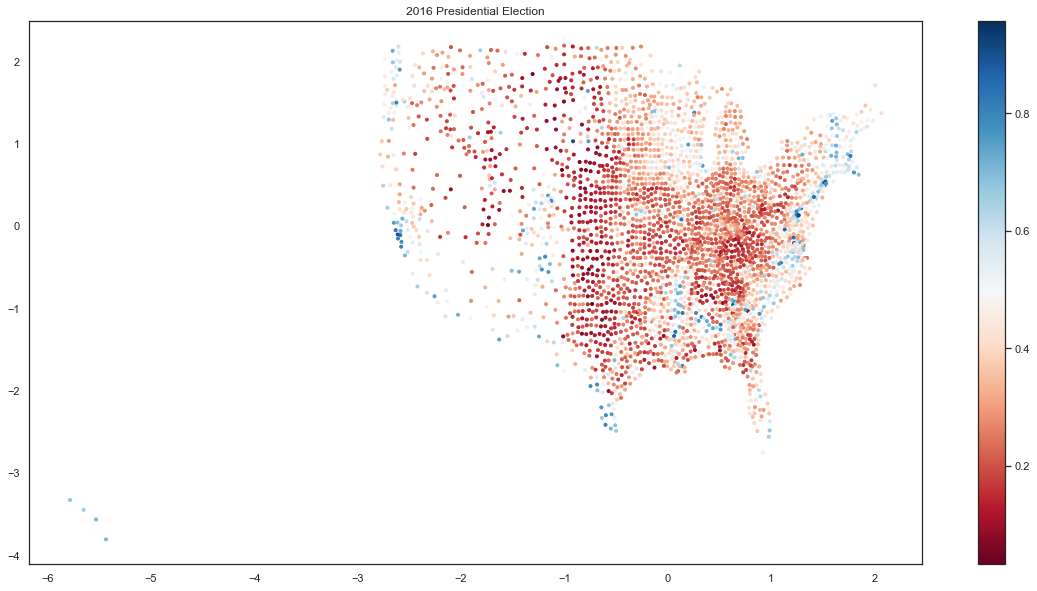

In [32]:
plt.figure(figsize=(20,10))

plt.scatter(df16['lng'],df16['lat'] , marker = '.', c = df16['dem_rep'], cmap = 'RdBu')
plt.title('2016 Presidential Election')
plt.colorbar()

plt.show()

In [33]:
df_04 = df04[['lat','lng','dem_rep']]
df_08 = df08[['lat','lng','dem_rep']]
df_12 = df12[['lat','lng','dem_rep']]
df_16 = df16[['lat','lng','dem_rep']]

In [15]:
arr04 = df_04.to_numpy()
arr04.astype(float)
print(arr04.shape)

arr08 = df_08.to_numpy()
arr08.astype(float)
print(arr08.shape)

arr12 = df_12.to_numpy()
arr12.astype(float)
print(arr12.shape)

arr16 = df_16.to_numpy()
arr16.astype(float)
print(arr16.shape)

array_list = [arr04, arr08, arr12, arr16]

(3112, 3)
(3112, 3)
(3112, 3)
(3112, 3)


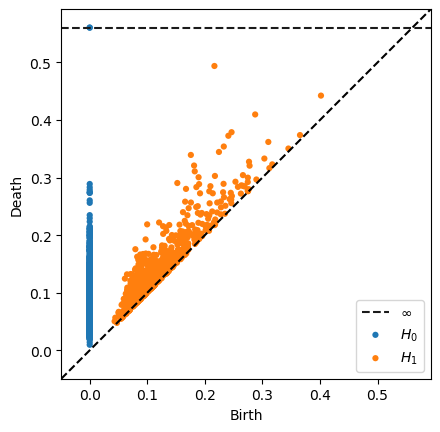

In [19]:
dgms = ripser(arr04, maxdim=1, thresh=2)['dgms']
plot_diagrams(dgms, show=True)


In [17]:
diagrams = []
for arr in array_list:
    diag = ripser(arr)['dgms']
    diagrams.append(diag)

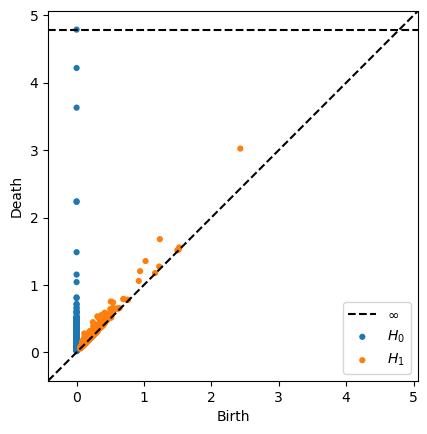

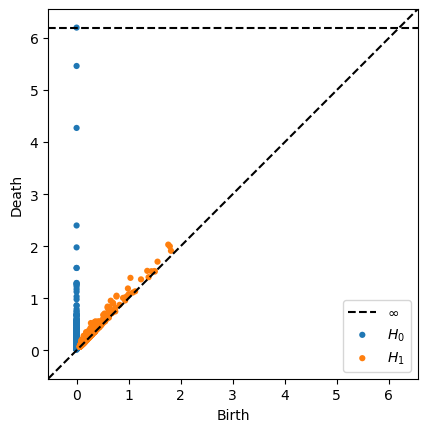

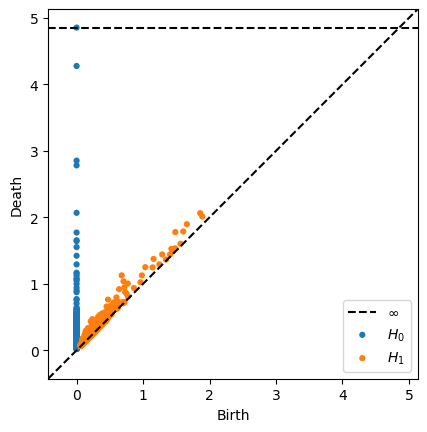

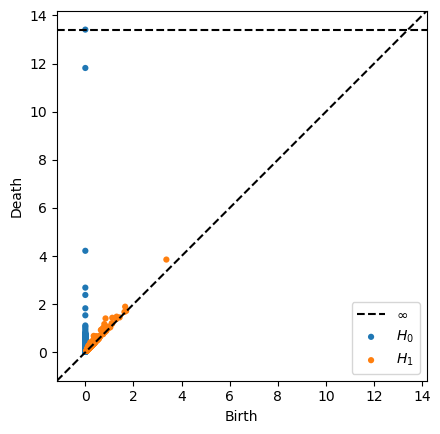

In [31]:
for i in range(len(diagrams)):
    plot_diagrams(diagrams[i], show=True)